### Customer Segmentation using Hierarchical Clustering

In this notebook, we will demonstrate the use of the Hierarchical Clustering algorithm for customer segmentation.
We will use synthetic data representing customers' annual income and spending score to create distinct customer segments.


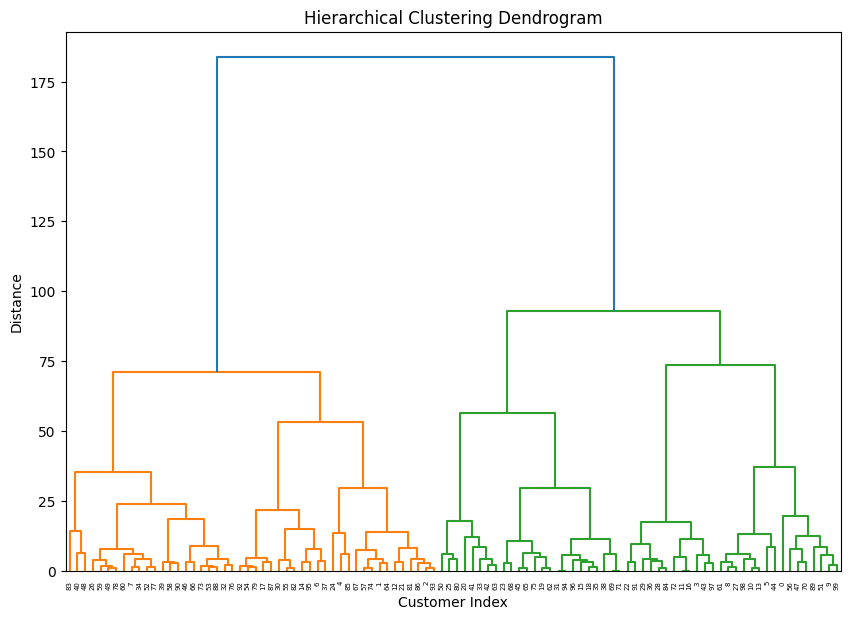

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


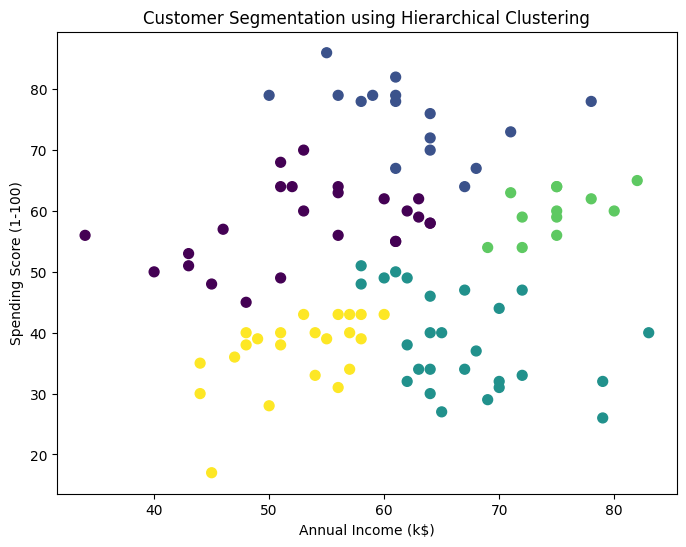

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Örnek veri oluşturma
np.random.seed(0)
customers_hc = pd.DataFrame({
    'CustomerID': range(1, 101),
    'Annual Income (k$)': np.random.normal(60, 10, 100).round(),
    'Spending Score (1-100)': np.random.normal(50, 15, 100).round()
})

# Hiyerarşik Kümeleme algoritmasını uygulama
linked_hc_real = sch.linkage(customers_hc[['Annual Income (k$)', 'Spending Score (1-100)']], method='ward')

# Dendrogram oluşturma ve görselleştirme
plt.figure(figsize=(10, 7))
dendrogram_real = sch.dendrogram(linked_hc_real)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

# Küme sayısını belirleme ve kümeleme
hc_real = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
customers_hc['Cluster'] = hc_real.fit_predict(customers_hc[['Annual Income (k$)', 'Spending Score (1-100)']])

# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(customers_hc['Annual Income (k$)'], customers_hc['Spending Score (1-100)'], c=customers_hc['Cluster'], s=50, cmap='viridis')
plt.title("Customer Segmentation using Hierarchical Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
